In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
business = pd.read_csv("Business_Listing.csv", low_memory=False)

In [27]:
business.head()

,X,Y,ObjectId,BusinessFactId,BusinessId,LegalEntityName,Dba,Ubi,Naic,LegalEntityType,...,MailingZip4,PhysicalAddressLine1,PhysicalAddressLine2,Textbox4,PhysicalCity,PhysicalState,PhysicalPostalCode,PhysicalZip4,ProductsAndServices,IssueDate
0,-122.118803,47.594151,1,1,171474,ABACUS SCIENTIFIC INC,ABACUS SCIENTIFIC,6.047495e+15,541519.0,Corporation,...,5150,16517 SE 18th St,NaN,16517 SE 18th St,Bellevue,WA,98008,5150.0,Research and development. Computer Software,2021-07-26 06:59:59+00:00
1,-122.132494,47.605783,2,2,171612,"BELLEVUE SUNFLOWER DAYCARE,LLC",BELLEVUE SUNFLOWER DAYCARE,6.047834e+15,611710.0,LLC or PLLC,...,5345,445 156th Ave SE,NaN,445 156th Ave SE,Bellevue,WA,98007,5345.0,Family childcare services for kids under 12-ye...,2021-08-09 06:59:59+00:00
2,-122.132017,47.622329,3,3,31781,BURGERMASTER OF BELLEVUE,NaN,1.790218e+08,722513.0,NaN,...,5098,1350 156TH AV NE,NaN,1350 156TH AV NE,BELLEVUE,WA,98007,4412.0,RESTAURANT,1988-11-01 07:59:59+00:00
3,-122.190504,47.626318,4,4,38947,CARL H JELSTRUP DC PS INC,NaN,6.013319e+08,621310.0,Corporation,...,NaN,1750 112TH AV NE,D154,1750 112TH AV NE D154,BELLEVUE,WA,98005,3727.0,CHIROPRACTIC HEALTH CARE,1992-04-01 08:00:00+00:00
4,-122.117462,47.641262,5,5,167692,ICK International Inc,ICK International Inc,6.044245e+15,541613.0,Corporation,...,6173,3508 167th Pl NE,NaN,3508 167th Pl NE,Bellevue,WA,98008,6173.0,SOFTWARE DEVELOPMENT and MARKETING,2020-04-08 06:59:59+00:00


In [5]:
business.shape

(41407, 28)

In [6]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41407 entries, 0 to 41406
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     41407 non-null  float64
 1   Y                     41407 non-null  float64
 2   ObjectId              41407 non-null  int64  
 3   BusinessFactId        41407 non-null  int64  
 4   BusinessId            41407 non-null  int64  
 5   LegalEntityName       41407 non-null  object 
 6   Dba                   9212 non-null   object 
 7   Ubi                   41407 non-null  float64
 8   Naic                  40592 non-null  float64
 9   LegalEntityType       39851 non-null  object 
 10  FirstActivityDate     41407 non-null  object 
 11  CancelDate            24972 non-null  object 
 12  MailingAddressId      41404 non-null  float64
 13  MailingAddressLine1   41404 non-null  object 
 14  MailingAddressLine2   16509 non-null  object 
 15  MailingCity        

In [7]:
business.isna().sum()

X                           0
Y                           0
ObjectId                    0
BusinessFactId              0
BusinessId                  0
LegalEntityName             0
Dba                     32195
Ubi                         0
Naic                      815
LegalEntityType          1556
FirstActivityDate           0
CancelDate              16435
MailingAddressId            3
MailingAddressLine1         3
MailingAddressLine2     24898
MailingCity                 3
MailingState                5
MailingPostalCode           3
MailingZip4             15294
PhysicalAddressLine1        0
PhysicalAddressLine2    21578
Textbox4                    0
PhysicalCity                0
PhysicalState               0
PhysicalPostalCode          0
PhysicalZip4            15624
ProductsAndServices       729
IssueDate                 217
dtype: int64

In [8]:
for date_col in ['FirstActivityDate','IssueDate']:
    business[date_col] = pd.to_datetime(business[date_col])


In [9]:
business['FirstActivityDate'].max(),business['FirstActivityDate'].min()

(Timestamp('2023-01-01 08:00:00+0000', tz='UTC'),
 Timestamp('1904-09-01 07:00:00+0000', tz='UTC'))

In [10]:
business['IssueDate'].max(),business['IssueDate'].min()

(Timestamp('2022-05-26 06:59:59+0000', tz='UTC'),
 Timestamp('1953-01-01 08:00:00+0000', tz='UTC'))

In [11]:
business = business.dropna(subset=['IssueDate'])
business.shape

(41190, 28)

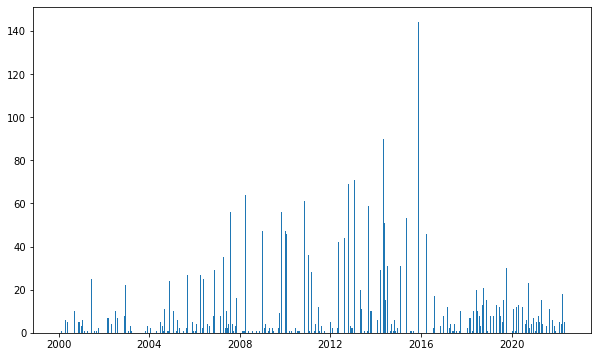

In [18]:
plt.figure(figsize=(10,6))
plt.hist(x=business['IssueDate'],bins=pd.date_range("2000-01-01", "2022-05-26", freq="D"))
plt.show()

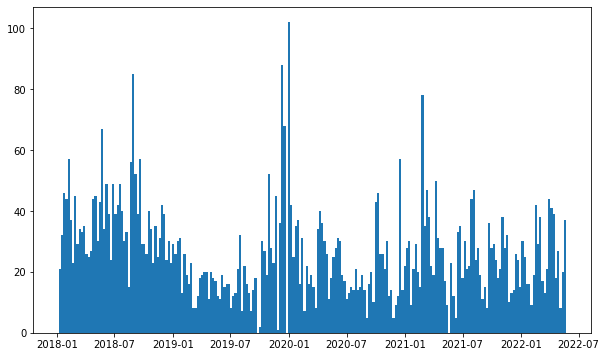

In [19]:
plt.figure(figsize=(10,6))
plt.hist(x=business['IssueDate'],bins=pd.date_range("2018-01-01", "2022-05-26", freq="W"))
plt.show()